Unsupervised Learning
---
Unsupervised learning is a class of machine learning techniques for discovering patterns in data. Unsupervised learning is having the machine learn from data that is not labelled, pattern discovery, unguided by prediction task.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
iris = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\iris.data.csv", names=["Petal Length", "Petal Width", "Sepal Length", "Sepal Width", "Species"])

iris_array =  iris.drop('Species', axis=1)
iris_array.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
samples = iris_array.sample(n=100, random_state=33)
samples.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
96,5.7,2.9,4.2,1.3
65,6.7,3.1,4.4,1.4
29,4.7,3.2,1.6,0.2
54,6.5,2.8,4.6,1.5
134,6.1,2.6,5.6,1.4


**Clustering 2D Points**
----
KMeans can be used to identify groups in 2D data. When the data visually shows three distinct groups, a KMeans model can be set to find three clusters. After fitting the model to the data, the `.predict()` method can assign cluster labels to new, unseen points.

In [67]:
#1. Import KMeans from sklearn.cluster.
from sklearn.cluster import KMeans

#2. Using KMeans(), create a KMeans instance called model to find 3 clusters. 3. To specify the number of clusters, use the n_clusters keyword argument.
model =  KMeans(n_clusters = 3)

#3. Use the .fit() method of model to fit the model to the samples.
model.fit(samples)

#4. Use the .predict() method of model to predict the cluster labels of samples, assigning the result to labels.
labels = model.predict(samples)

# Print cluster labels of samples
print(labels)


[2 2 1 2 0 0 1 1 0 0 0 1 0 2 0 2 2 1 2 0 1 1 0 1 2 2 2 2 0 2 2 2 2 0 0 0 2
 2 2 1 2 2 2 1 1 2 1 0 1 1 2 0 1 2 2 0 2 2 1 1 2 1 1 0 2 2 0 0 0 2 1 1 2 2
 1 2 2 2 0 1 0 1 2 1 0 2 1 0 2 1 1 0 1 1 1 0 0 1 2 1]


Visualizing The clustering
----
Let's now inspect the clustering you performed in the previous exercise!

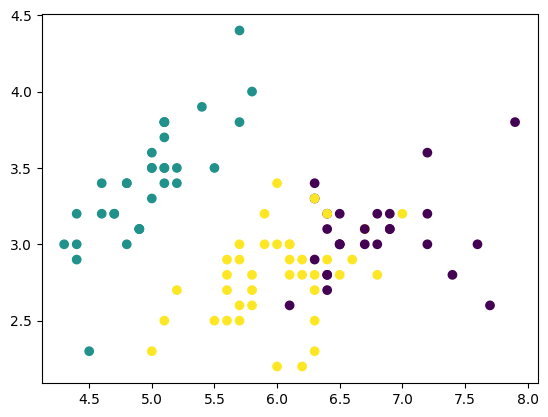

In [68]:
#2. Assign column 0 of samples to xs, and column 1 of samples to ys.
xs = samples.iloc[:,0]
ys = samples.iloc[:,1]


#3. Make a scatter plot of xs and ys, specifying the c=labels keyword arguments to color the points by their cluster label.
plt.scatter(xs,ys, c=labels);

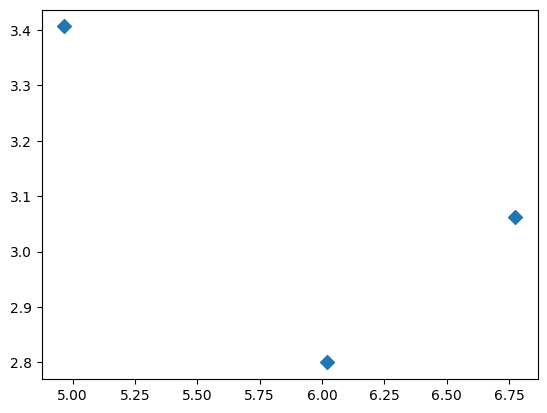

In [69]:
#4.Compute the coordinates of the centroids using the .cluster_centers_ attribute of model.
centroids = model.cluster_centers_

#5. Assign column 0 of centroids to centroids_x, and column 1 of centroids to centroids_y.
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

#6. Make a scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.

plt.scatter(centroids_x, centroids_y, marker='D', s=50);

**Choosing the Number of Clusters**
----
The inertia graph helps determine the best number of clusters. Inertia measures how close the data points are to their cluster centers. A good number of clusters is found at the "elbow point," where adding more clusters no longer leads to significant improvements.

In [70]:
grains = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\Grains\seeds.csv")
grains.head()

,1,2,3,4,5,6,7,Varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Rosa
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Rosa
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Rosa
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Rosa
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Rosa


In [71]:
#Converting The PD DataFrame to a NumPy array
sample_g = grains.iloc[:, :-1].values   # all columns except last
varieties = grains.iloc[:, -1].values  # last column with variety names

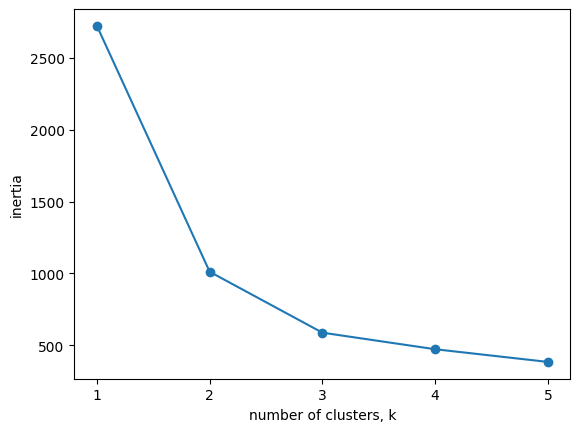

In [72]:
ks = range(1,6)
inertias = []

for k in ks:
    #1. Create a KMeans instance called model with k clusters.
    model = KMeans(n_clusters = k)

    #2. Fit the model to the grain data samples.
    model.fit(sample_g)

    #3. Append the value of the inertia_ attribute of model to the list inertias.
    inertias.append(model.inertia_)

#4. The code to plot ks vs inertias has been written for you, so hit submit to see the plot!
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

**Evaluating Grain Clustering**
----
Grain samples can be grouped into three clusters using KMeans. The predicted clusters can then be compared with the known grain varieties through cross-tabulation. This comparison reveals how closely the clustering aligns with the actual categories.

In [73]:
#1. Create a KMeans model called model with 3 clusters.
kmeans = KMeans(n_clusters=3)

#2. Use the .fit_predict() method of model to fit it to samples and derive the cluster labels. Using .fit_predict() is the same as using .fit() followed by .predict().
labels_g = kmeans.fit_predict(sample_g)

#3. Create a DataFrame df with two columns named 'labels' and 'varieties', using labels and varieties, respectively, for the column values.
df = pd.DataFrame({'labels': labels_g, 'varieties': varieties})

#4. Use the pd.crosstab() function on df['labels'] and df['varieties'] to count the number of times each grain variety coincides with each cluster label. Assign the result to ct.
ct = pd.crosstab(df['labels'], df['varieties'])

print(ct)


varieties  Canadian  Kama  Rosa
labels                         
0                 0    60     1
1                70     0    12
2                 0    10    57


**Scaling Fish Data**
----
Fish measurements such as weight, length, and height-to-length ratio have different units and scales. Standardizing the data ensures that no single feature dominates the clustering process. A pipeline can be created to first scale the data before applying KMeans.

In [74]:
fish = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\fish.csv", header=None)
fish.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [75]:
sample_f = fish.iloc[:, 1:].values
species = fish.iloc[:,0].values

In [76]:
#1. Import relevant libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
#2. Create an instance of StandardScaler called scaler.
scaler = StandardScaler()

#3. Create an instance of KMeans with 4 clusters called kmeans.
kmeansf = KMeans(n_clusters = 4)

#4. Create a pipeline called pipeline that chains scaler and kmeans. To do this, you just need to pass them in as arguments to make_pipeline().
pipeline = make_pipeline(scaler, kmeansf)

**Clustering Fish Data**
----
After building the standardization and clustering pipeline, it can be applied to the fish dataset. The resulting cluster labels are then compared with the known species using cross-tabulation to evaluate the clustering accuracy.

In [78]:
#1. Fit the pipeline to the fish measurements samples.
label_f = pipeline.fit(sample_f)

#2. Obtain the cluster labels for samples by using the .predict() method of pipeline
pipeline.predict(sample_f)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3],
      dtype=int32)

In [79]:
#3. Using pd.DataFrame(), create a DataFrame df with two columns named 'labels' and 'species', using labels and species, respectively, for the column values.

df_fish = pd.DataFrame({'labels':label_f, 'species':species})

#4. Using pd.crosstab(), create a cross-tabulation ct of df['labels'] and df['species'].
ct_f = pd.crosstab(df_fish['labels'], df_fish['species'])
ct_f

species,Bream,Pike,Roach,Smelt
labels,,,,
"(StandardScaler(), KMeans(n_clusters=4))",34,17,20,14


**Clustering Stocks**
----
Stock price movements vary in scale depending on the company. To handle this, a `Normalizer` is used to scale each company’s price movement relative to its own range. This transformation is combined with KMeans in a pipeline to cluster companies based on daily price changes.

In [80]:
stock = pd.read_csv(r"C:\Users\Emigb\Documents\Data Science\datasets\company-stock-movements-2010-2015-incl.csv")
stock.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [81]:
movements = stock.iloc[:,1:].values
company = stock.iloc[:,0].values

In [82]:
#1. Import Normalizer from sklearn.preprocessing.
from sklearn.preprocessing import Normalizer

#2. Create an instance of Normalizer called normalizer.
normalizer = Normalizer()

#3. Create an instance of KMeans called kmeans_m with 10 clusters.
kmeans_m = KMeans(n_clusters = 10)

#4. Using make_pipeline(), create a pipeline called pipeline that chains normalizer and kmeans.
pipeline_m = make_pipeline(normalizer, kmeans_m)

#5. Fit the pipeline to the movements array.
pipeline_m.fit(movements)


print(label_m[:10])  # Inspect the first 10 values
print(type(label_m))


[9 1 8 1 2 1 5 4 2 3]
<class 'numpy.ndarray'>


**Stocks Moving Together**
----
By inspecting the cluster labels from the stock clustering, it becomes possible to identify which companies have stock prices that move in similar patterns. This information can be compared to the list of company names to find groups with similar behaviors

In [83]:
#2. Use the .predict() method of the pipeline to predict the labels for movements.
label_m = pipeline_m.predict(movements)

#3. Align the cluster labels with the list of company names companies by creating a DataFrame df with labels and companies as columns.
df_m = pd.DataFrame({'labels':label_m, 'companies':company})

#4. Use the .sort_values() method of df to sort the DataFrame by the 'labels' column, and print the result.
print(df_m.sort_values(by='labels'))

    labels                           companies
35       0                            Navistar
7        1                               Canon
21       1                               Honda
15       1                                Ford
48       1                              Toyota
45       1                                Sony
34       1                          Mitsubishi
22       1                                  HP
58       1                               Xerox
23       2                                 IBM
33       2                           Microsoft
47       2                            Symantec
30       2                          MasterCard
17       2                     Google/Alphabet
25       3                   Johnson & Johnson
19       3                     GlaxoSmithKline
46       3                      Sanofi-Aventis
39       3                              Pfizer
9        4                   Colgate-Palmolive
27       4                      Kimberly-Clark
40       4   